#### KNN(k-Nearset Neighbors,KNN,k_최근접이웃) 알고리즘

`kNN`은 지도학습중 분류분제에 사용하는 알고리즘이다. 분류문제란 새로운 데이터가 들어왔을 때 가존 데이터의 그룹중 " 어떤 그룹에 속하는 가를 분류" 하는 문제이다.

`kNN` 알고리즘은 지도학습(Supervised Learning)의 한 종류로 레이블(정답)이 있는 데이터를 사용하여 분류작업을 하는 알고리즘이다. 알고리즘의 이름에서 볼 수 있듯이 데이터로부터 `거리가 가까운 k개` 의 다른 데이터의 레이블을 참조하여 분류하는 알고리즘이다.
<img src="./images/28.머신러닝_지도학습_4_KNN_01.png" width=500 height=400>

##### kNN의 장점
* 알고리즘이 간단하여 구현하기가 쉽다.
* 수치 기반 데이터 분류작업에서 성능이 좋다.

##### kNN의 단점

* 학습데이터양이 많으면 상대적으로 분류속도가 느리다.(사실 사전 계산을 할 수 없기 때문에 학습과정이 따로 없기 때문에 분류속도가 느리다.)
* 차원(벡터)의 크기가 크면 계산량이 많아진다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=300

###### 실습1 kNN-forge데이터셋

In [2]:
import mglearn
from sklearn.model_selection import train_test_split

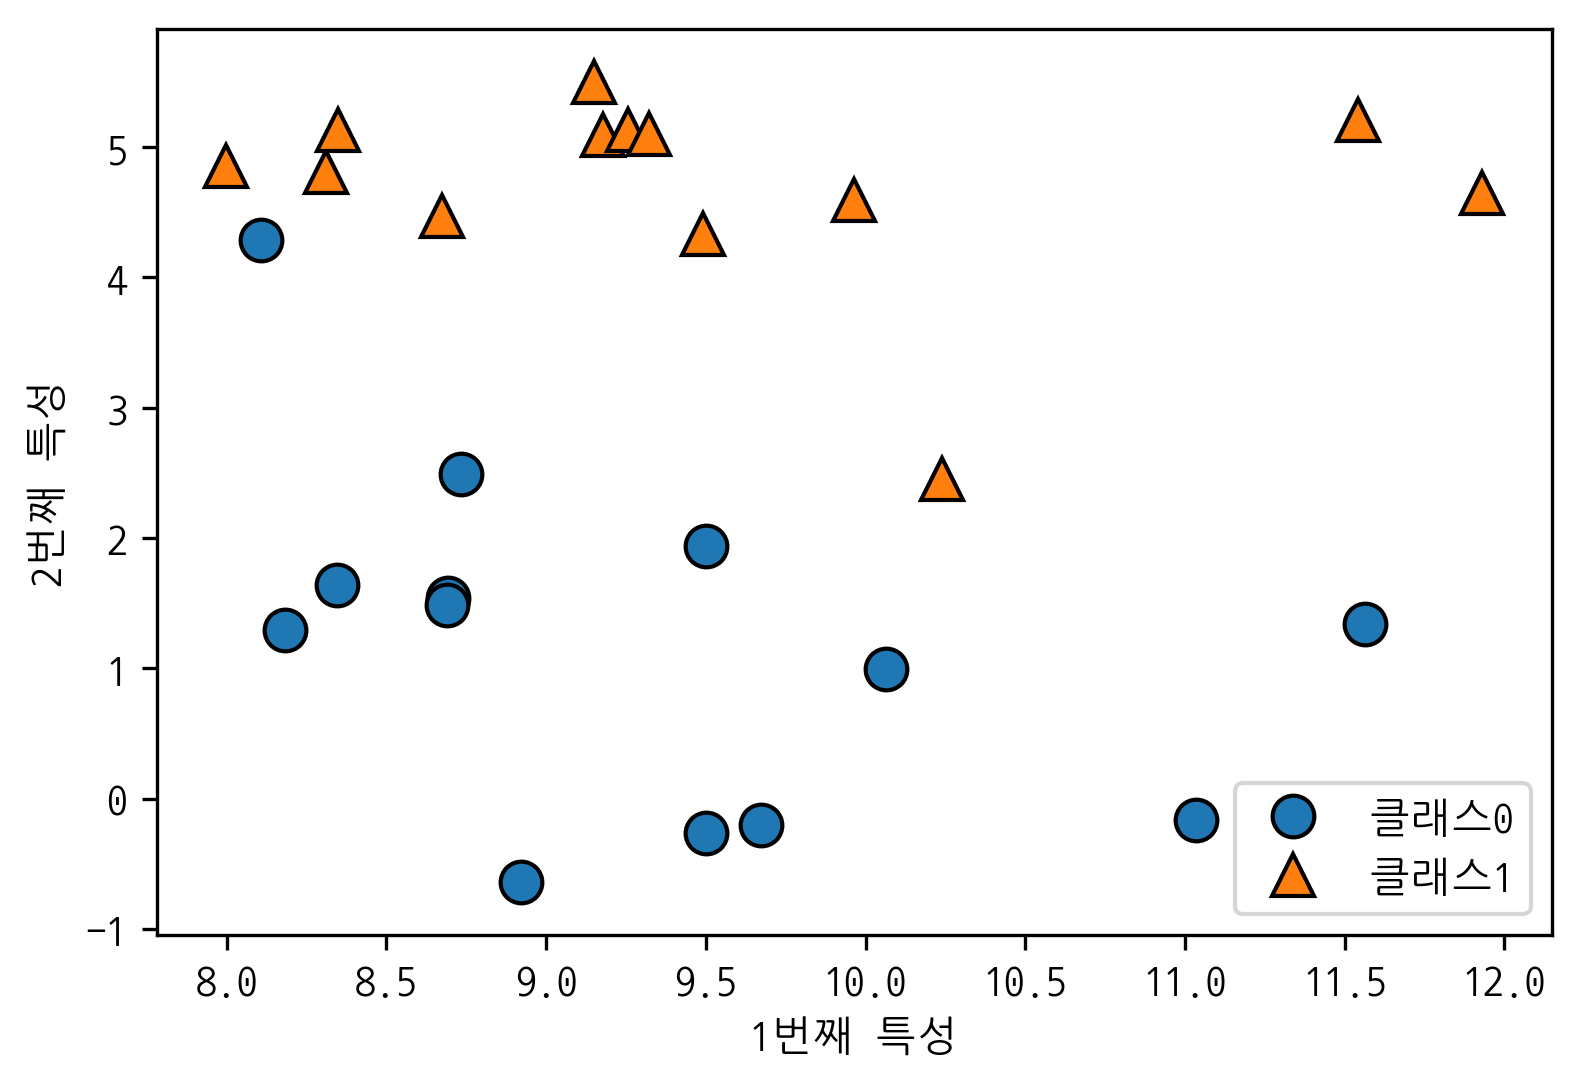

X.shape :(26, 2)


In [16]:
# forge데이터셋을 생성 : kNN을 실습하기 위해 인위적으로 만들어 놓은 데이터셋
X, y = mglearn.datasets.make_forge()
# print(X[:5],"\n",y[:5])

# 산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스0","클래스1"],loc=4)
plt.xlabel("1번째 특성")
plt.ylabel("2번째 특성")
plt.show()

# 데이터포인트 26개와 2개의 특성
print('X.shape :{}'.format(X.shape))

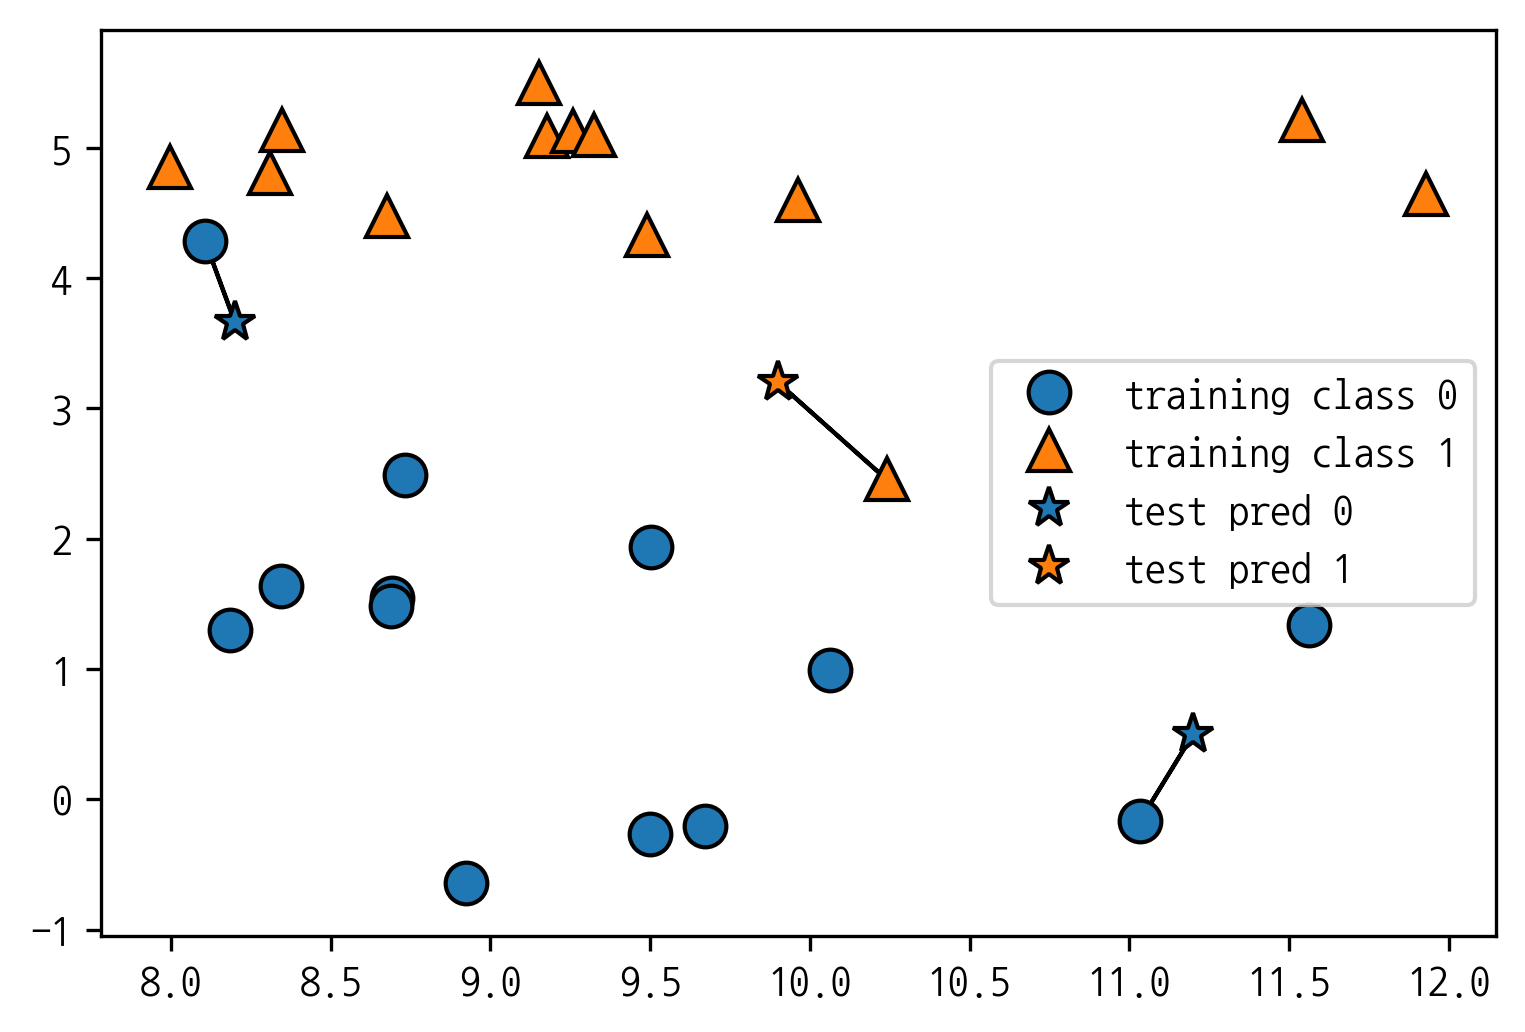

In [17]:
# k=1일 경우(최근접 이웃을 1개로 기준해서 분류)
mglearn.plots.plot_knn_classification(n_neighbors=1)

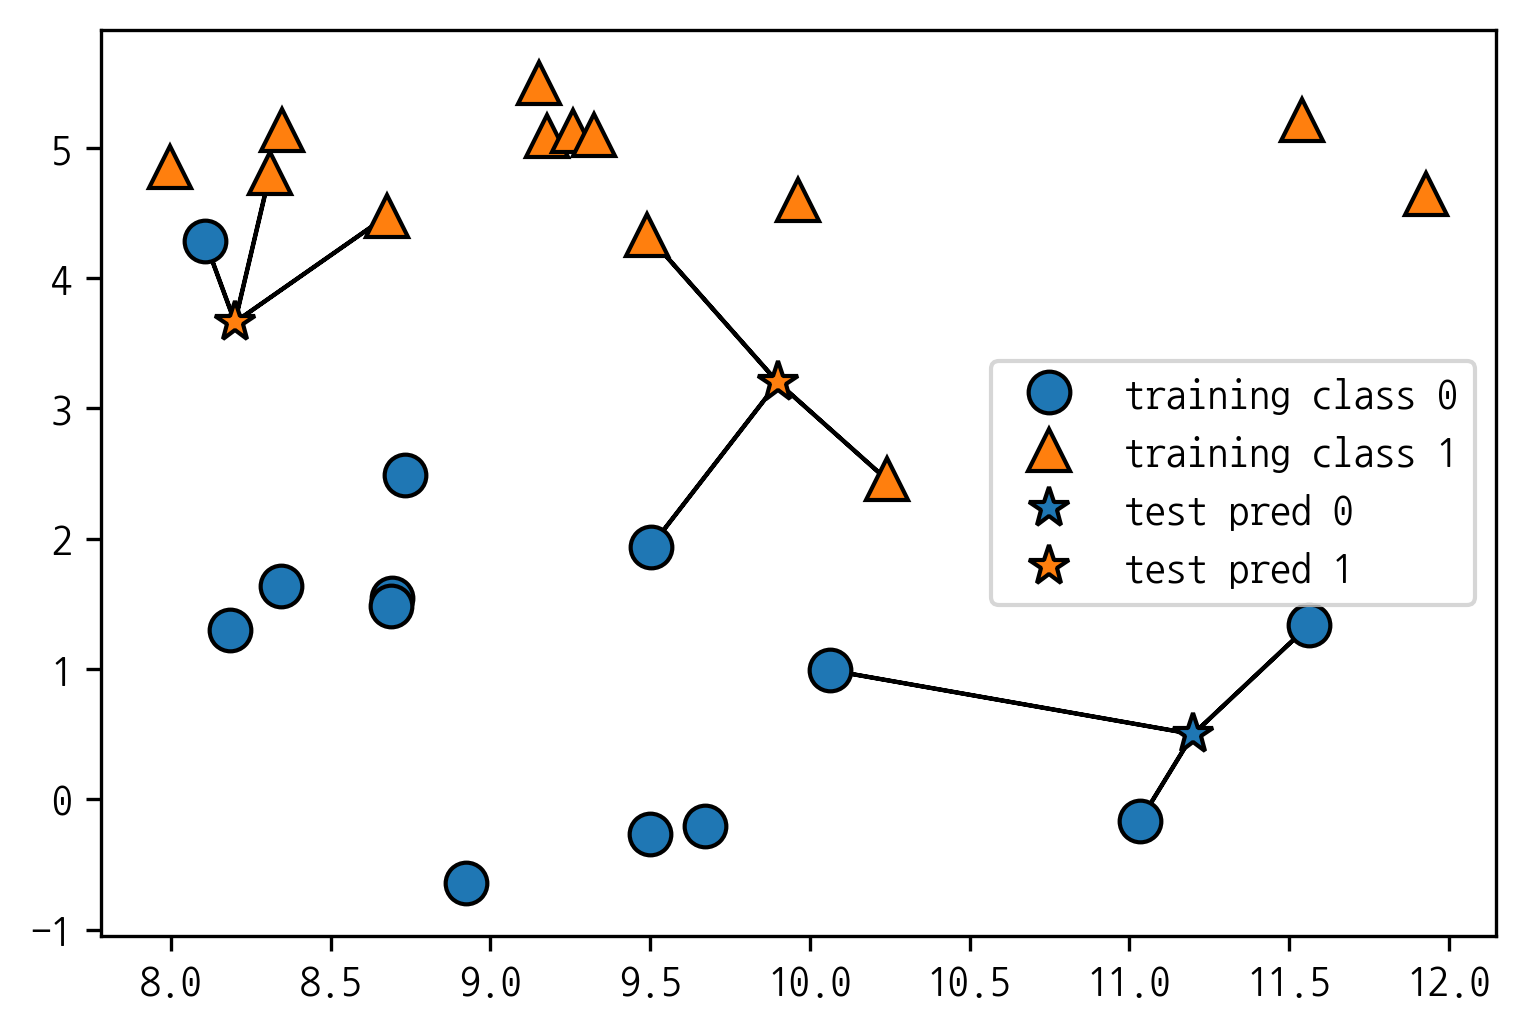

In [18]:
# k=3일 경우(최근접 이웃을 3개로 기준해서 분류)
mglearn.plots.plot_knn_classification(n_neighbors=3)

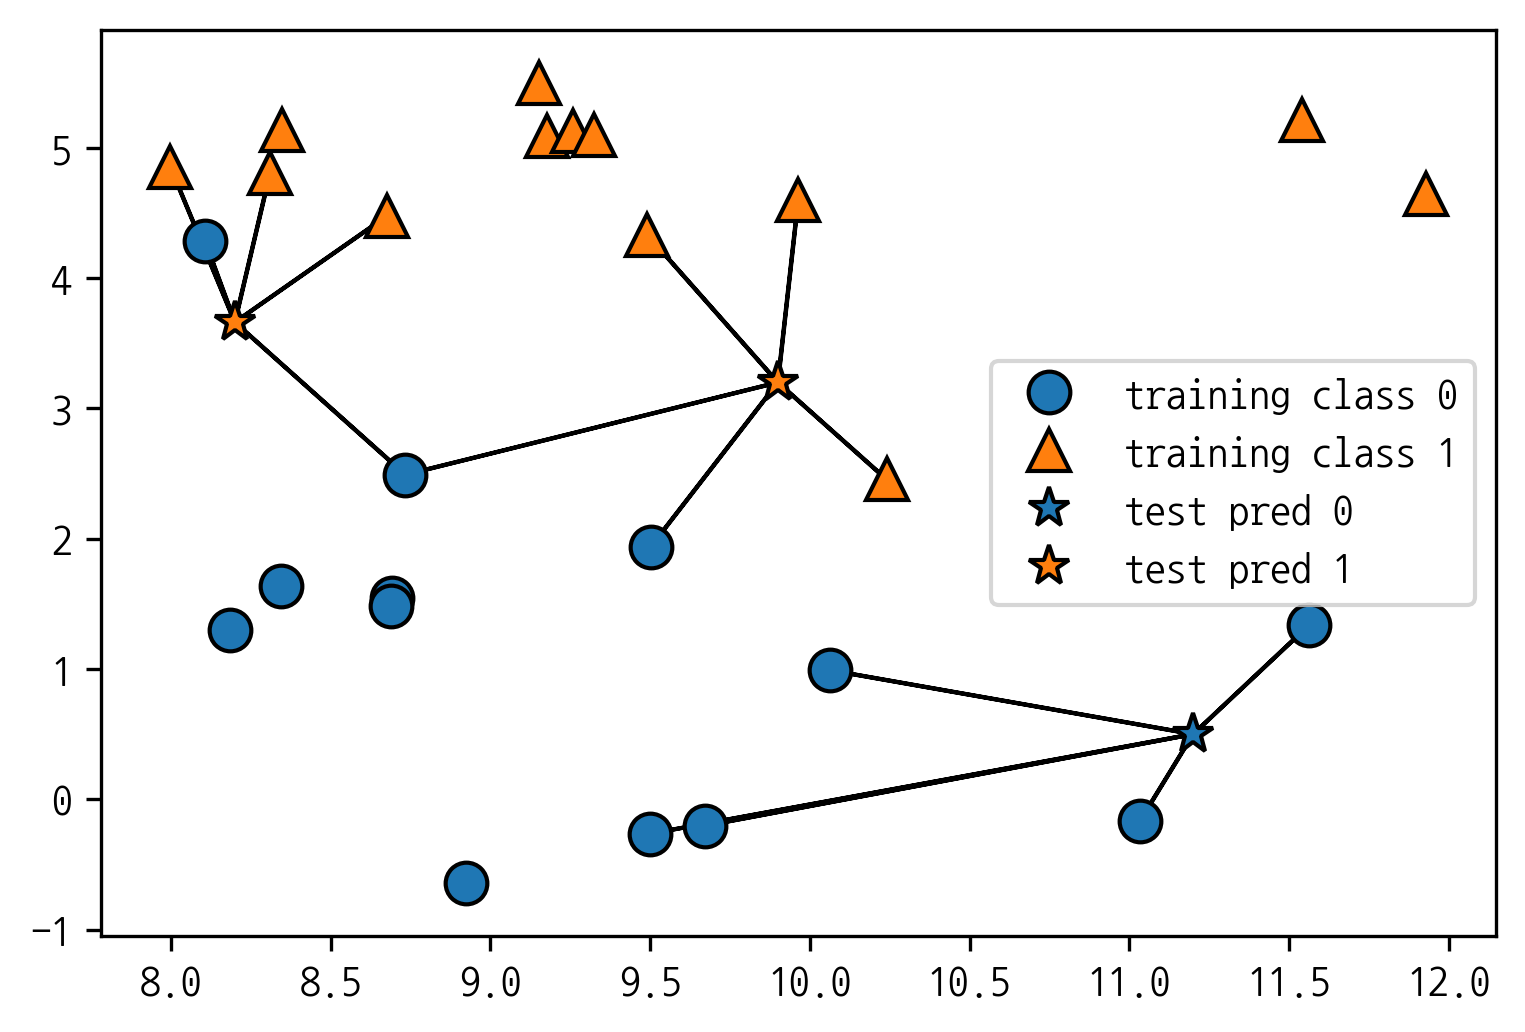

In [19]:
# k=5일 경우(최근접 이웃을 5개로 기준해서 분류)
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [210]:
# sklearn의 KNeighborsClassifier로 기계학습
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=9).fit(X_train,y_train)
print("훈련세트점수 :{:.3f}".format(knn.score(X_train,y_train)))
print("검증세트점수 :{:.3f}".format(knn.score(X_test,y_test)))
print()

print("검증용 데이터 예측: {}".format(knn.predict(X_test)))
print()
# 검증용 데이터의 정확도 85% 7개의 결과값중 맞다가 5 틀리다가 2


훈련세트점수 :0.947
검증세트점수 :0.857

검증용 데이터 예측: [1 1 1 1 0 1 0]



In [ ]:
# kNN의 k=1,3,9일 때 그래프 시각화

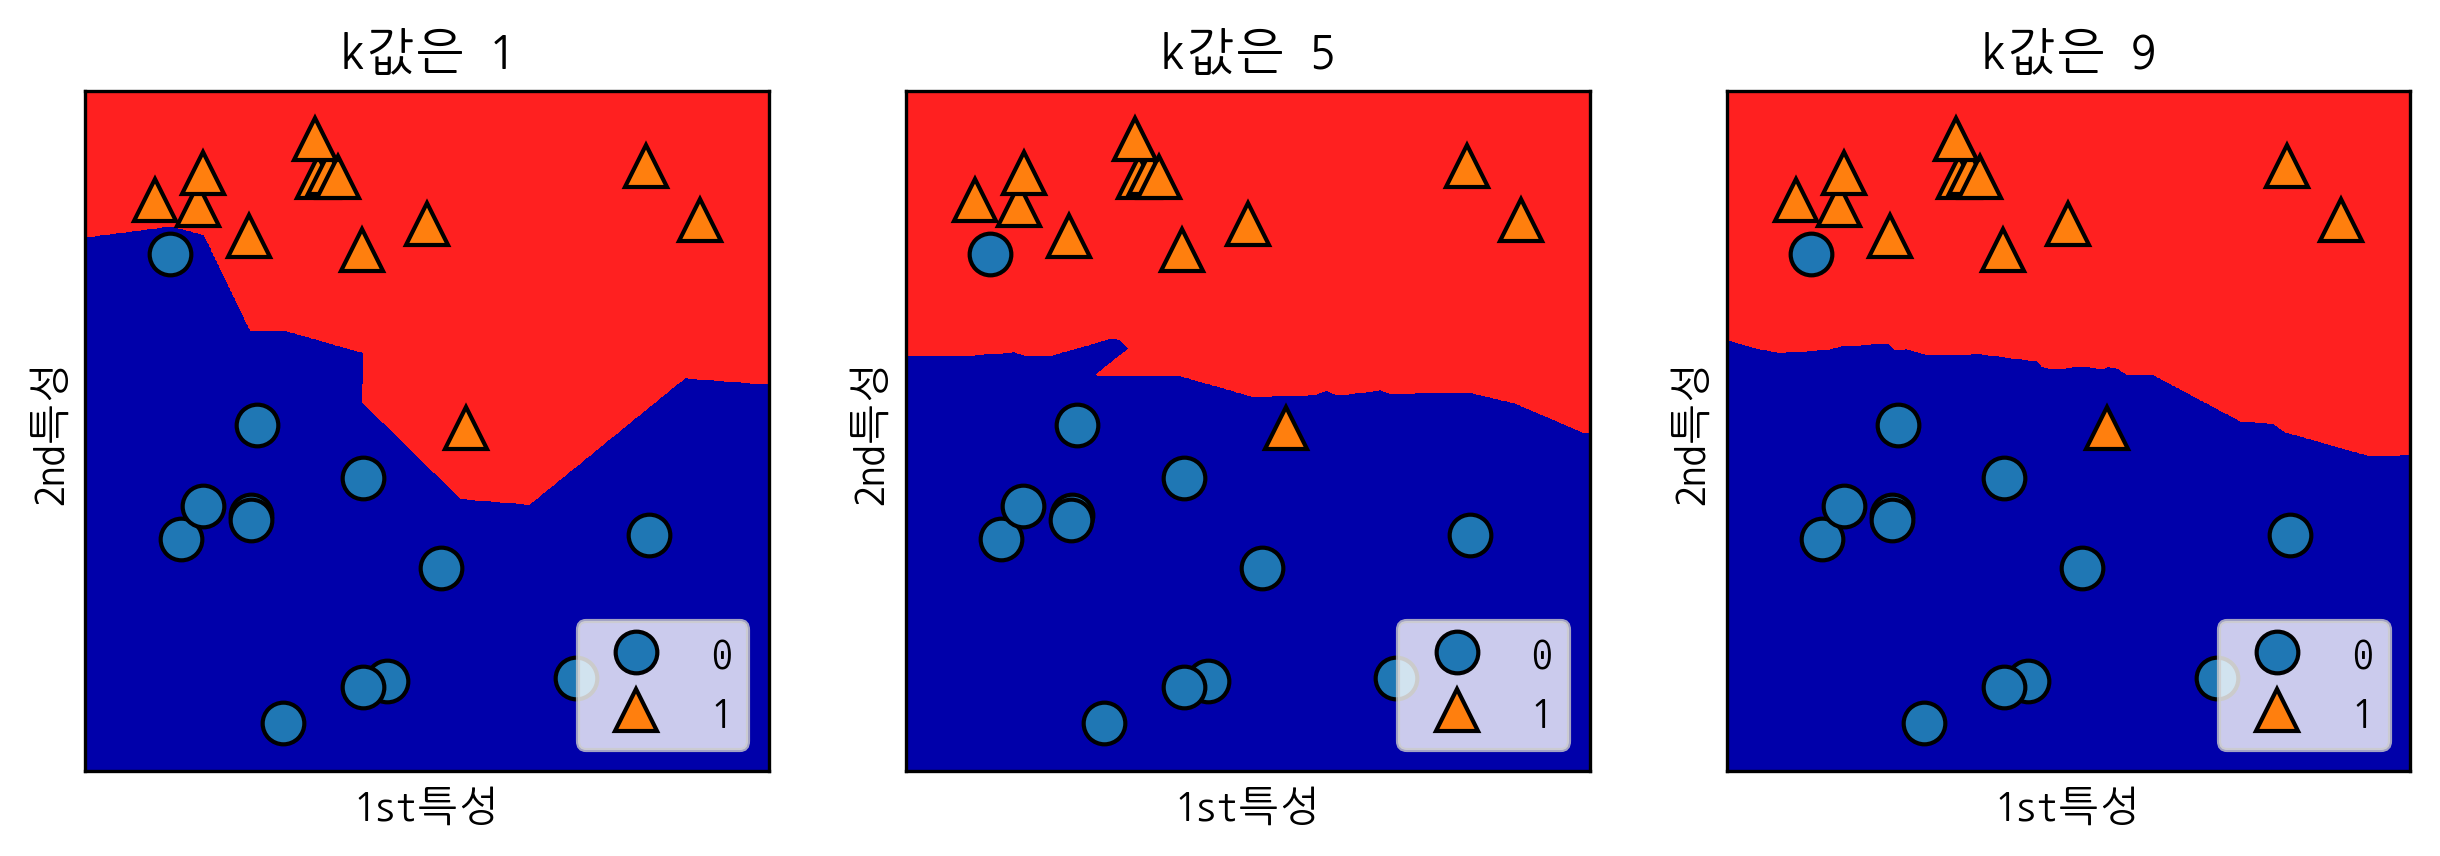

In [52]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
# print(axes)

# zip 함수는 앞의갚과 뒤의 값을 조합하는 함수 
for n , ax in zip([1,5,9], axes):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X,y)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    # 경계면을 그려주는 함수 plot_2d_separator   eps는 폭  ax는 넣을 그림판,
    mglearn.plots.plot_2d_separator(knn,X,fill=True,eps=0.5,ax=ax)
    ax.set_title("k값은 {0}".format(n))
    ax.set_xlabel("1st특성")
    ax.set_ylabel("2nd특성")
    ax.legend()
# 3번째 것은 86퍼정도 정확했다는 의미
plt.show()

# 결과분석
# k=1 : 훈련데이터셋에 가깝게 근접함
# 이웃의 갯수를 늘릴수록 결정경계는 더 부드러워 짐(완만해짐)
# 이웃의 수를 적게 하면 모델의 복잡도가 높아지고 많게 하면 복잡도는 낮아진다.

#### 실습 2. 유방암 데이터셋


In [54]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
print("cancer.key(): {}".format(cancer.keys()))
print("cancer 데이터 형태 : {}".format(cancer.data.shape)) # (569,30)

# 악성 212, 양성 357
print("클래스별 샘플 갯수 : {}".format(
    {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("특성이름 : {}".format(cancer.feature_names))

cancer.key(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
cancer 데이터 형태 : (569, 30)
클래스별 샘플 갯수 : {'malignant': 212, 'benign': 357}
특성이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [66]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                 stratify=cancer.target, random_state=66)
train_rate = []
test_rate = []
# kNN은 k 값에 따라 결과가 달라지므로 어떤 k값이 최적인지 찾아내는 것이 필요 
# k값을 1~10까지 n_neighbors를 적용
neighbors = range(1,11)
for n in neighbors:
    knn =KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    # 학습용, 검증용 데이터셋의 정확도(예측)
    train_rate.append(knn.score(X_train,y_train))
    test_rate.append(knn.score(X_test,y_test))
    
print("학습용 데이터셋의 정확도: {}".format(train_rate))
print("검증용 데이터셋의 정확도: {}".format(test_rate))

학습용 데이터셋의 정확도: [1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
검증용 데이터셋의 정확도: [0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


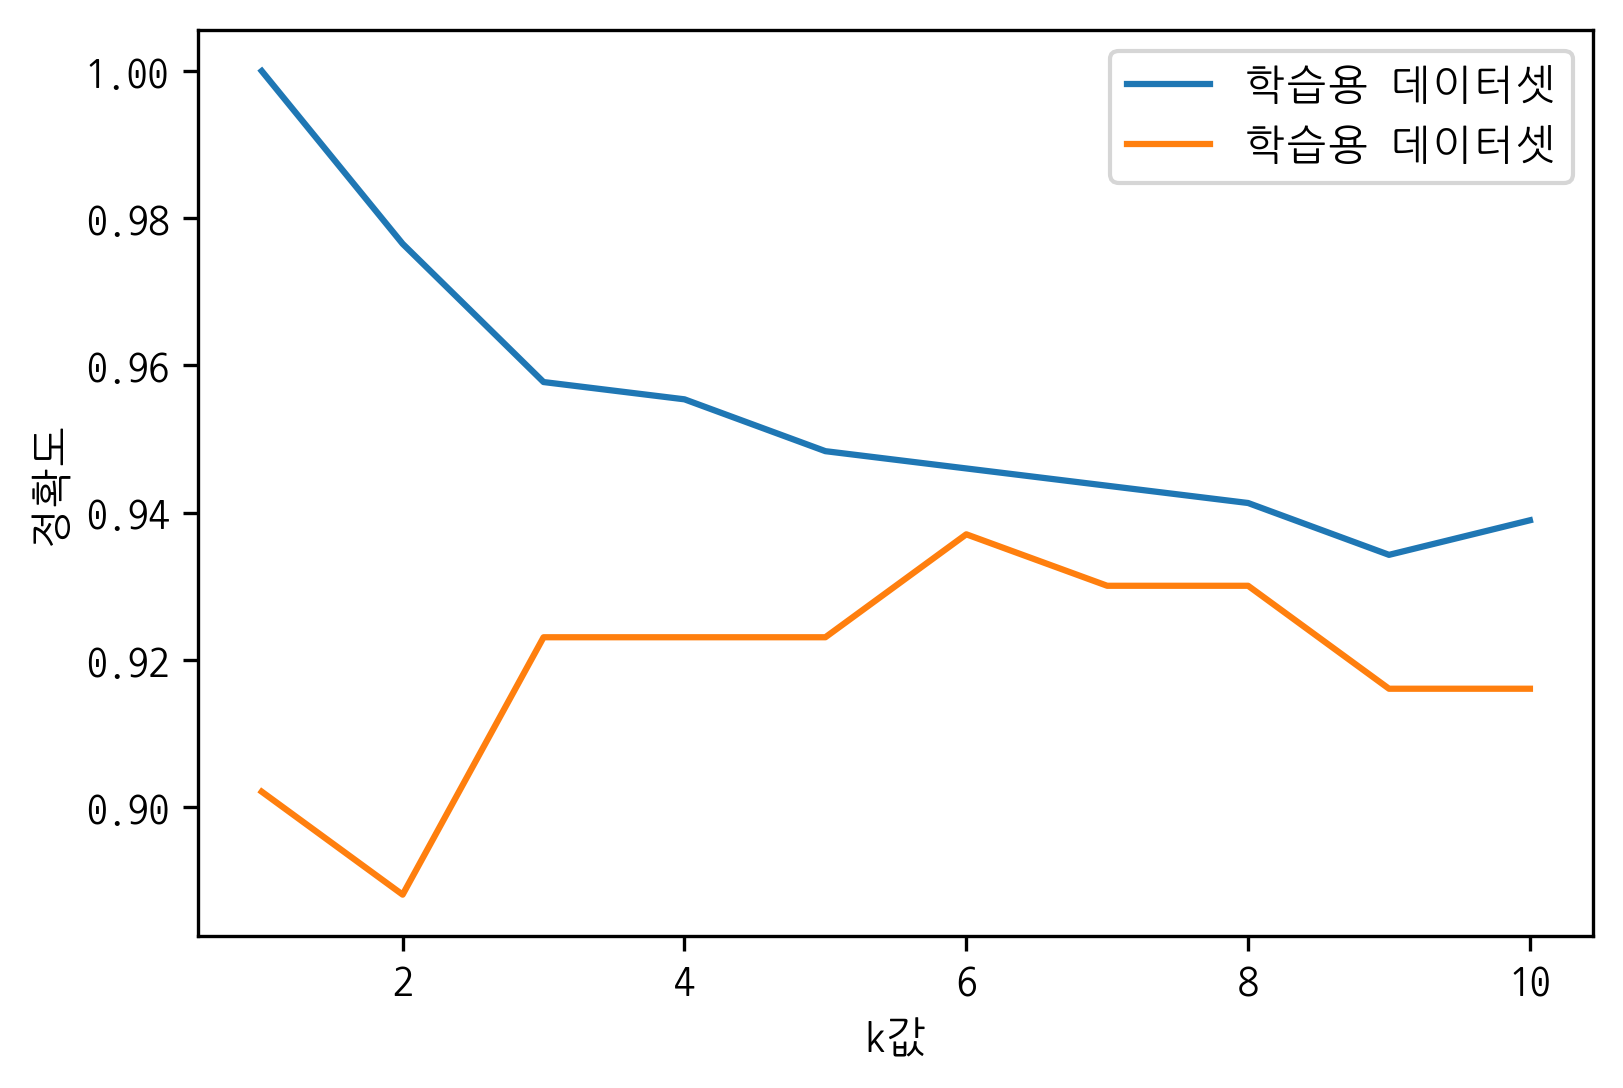

In [67]:
# 결과 시각화
plt.plot(neighbors,train_rate,label="학습용 데이터셋")
plt.plot(neighbors,test_rate,label="학습용 데이터셋")
plt.xlabel("k값") # 이웃의 갯수
plt.ylabel("정확도")# 예측율
plt.legend()
plt.show()

# 결과 분석
# 학습용 데이터셋의 경우 이웃이 1개일 때 100%의 예측률을 가지고 있다.
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해진다.
# k=6으로 햇을 경우 테스트의 정확도가 가장 높다.

#### kNN회귀 실습
Knn은 회귀분석에도 사용된다. wave데이터셋을 이용하여 knn회귀분석을 실습

In [ ]:
# wave데이터셋을 이용한 3-KNN 회귀모델 예제

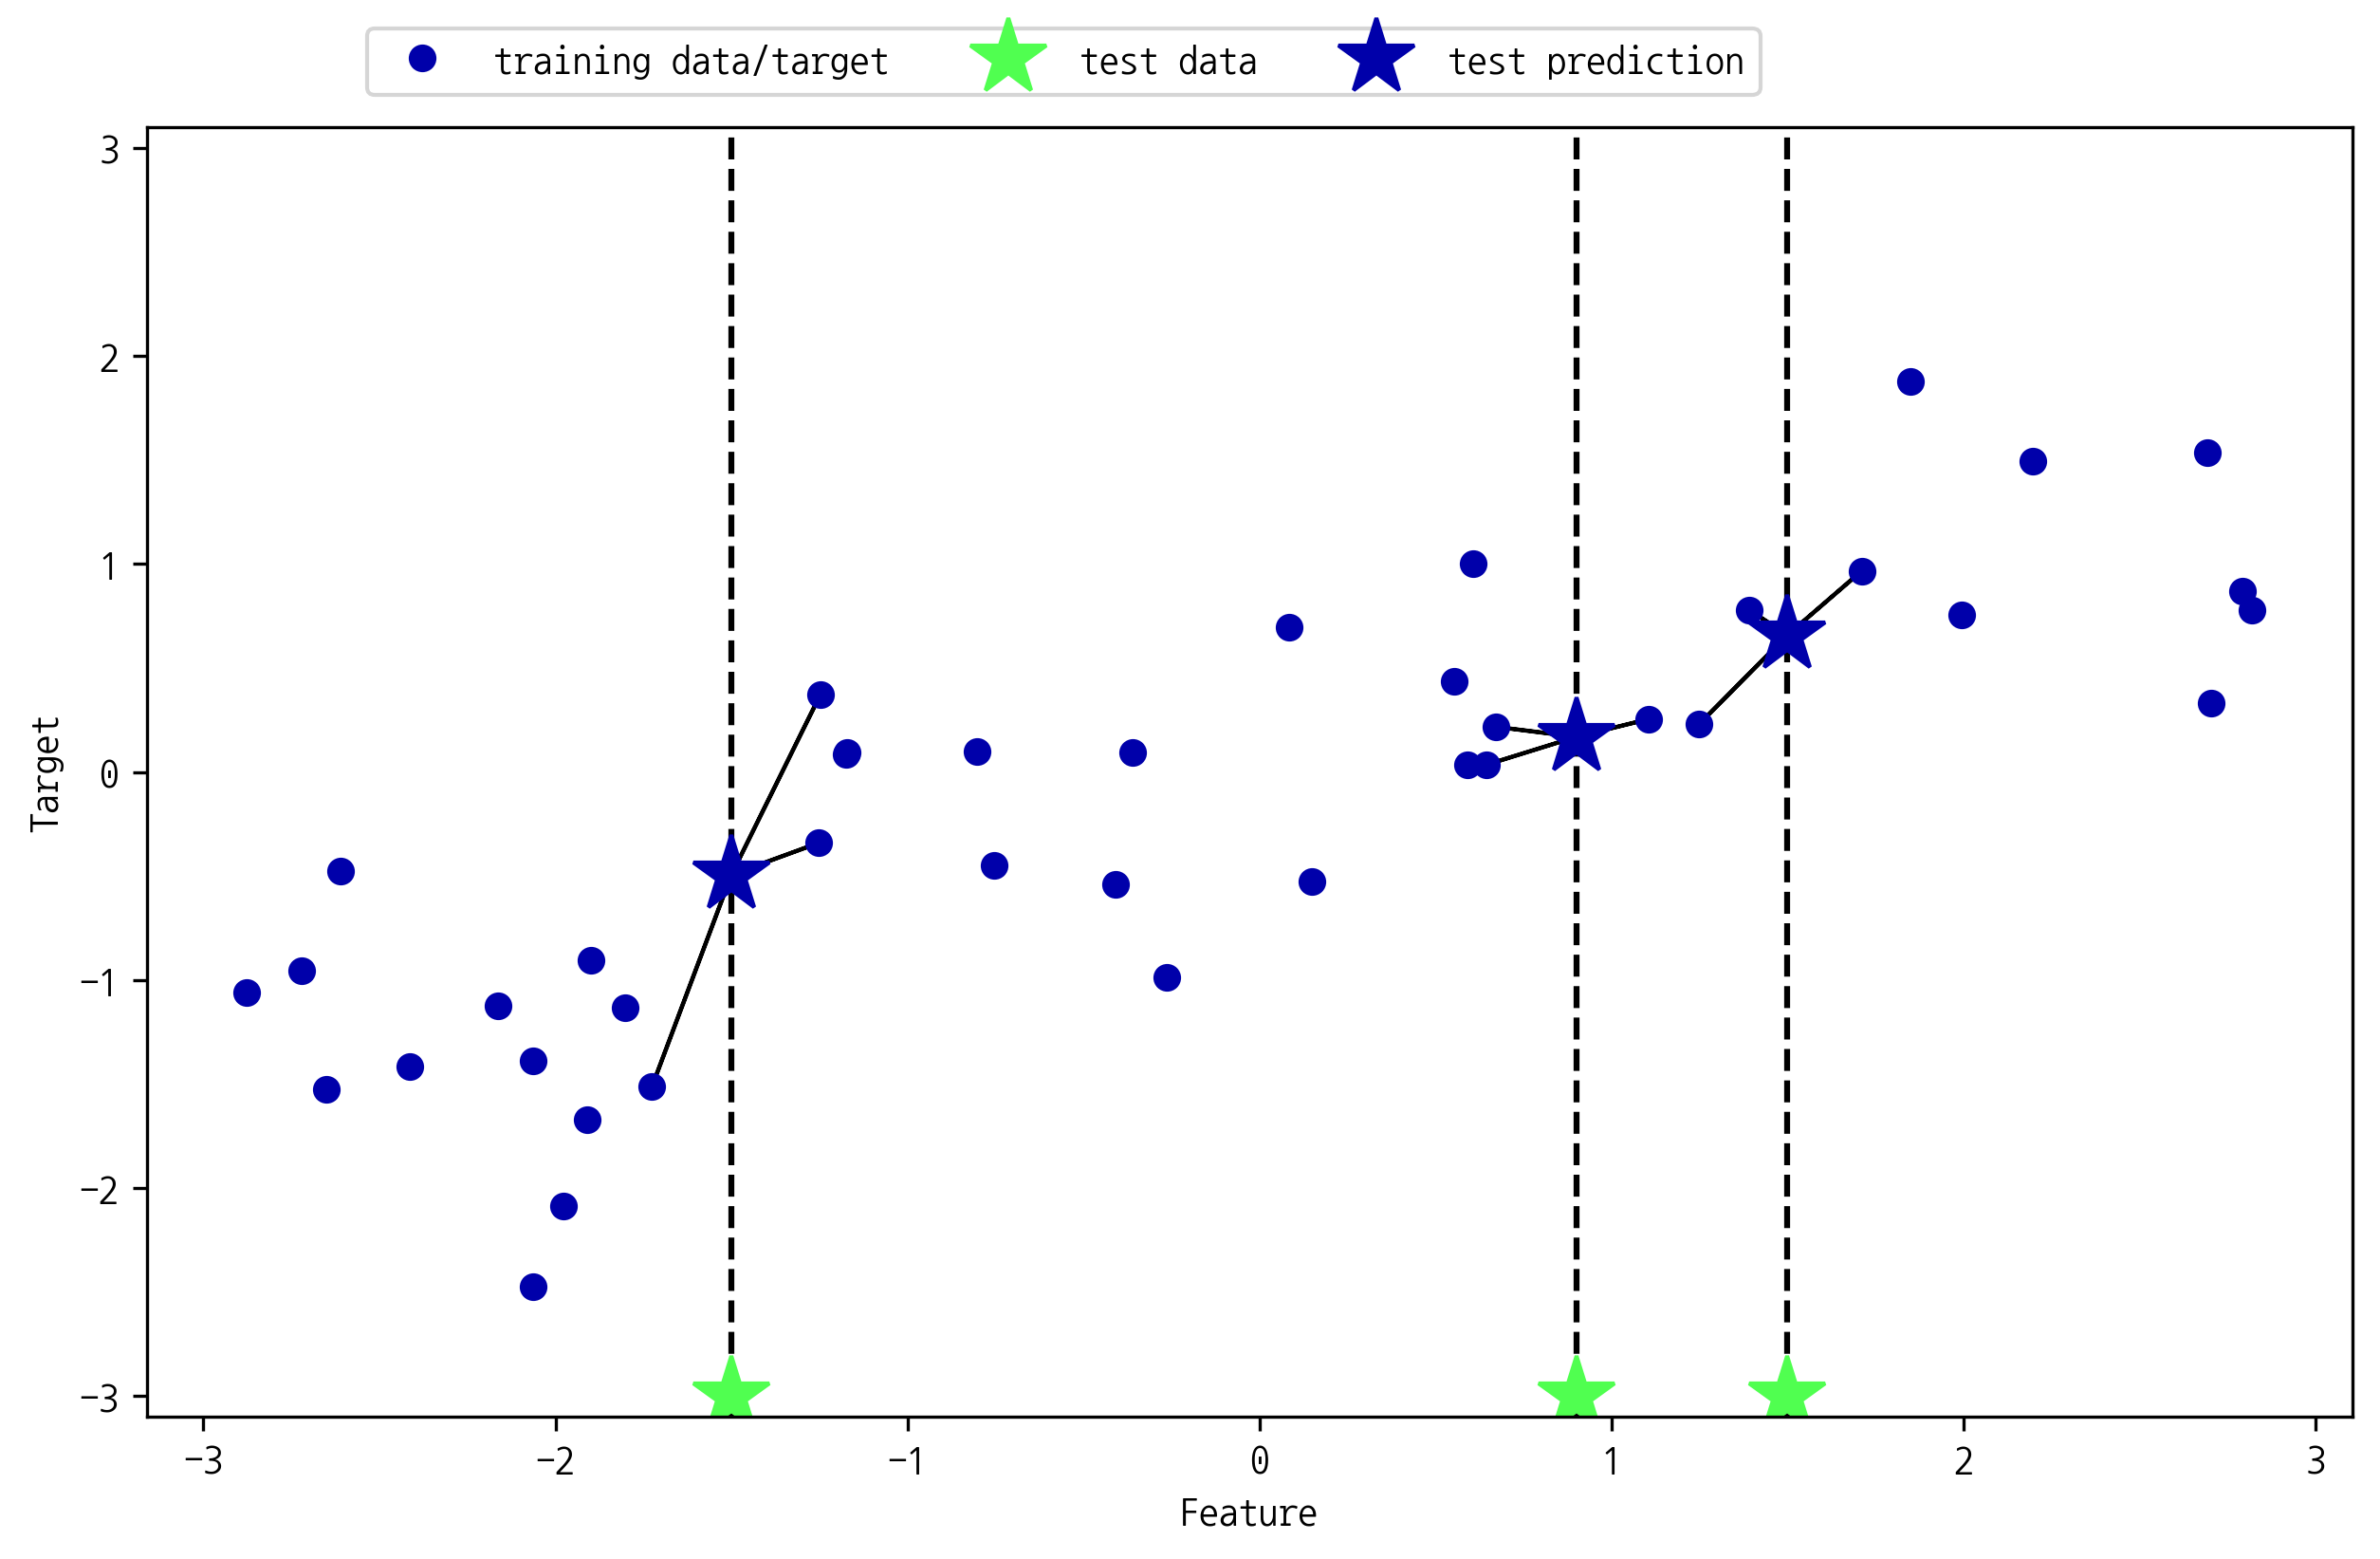

In [69]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [3]:
# sciki-learn에서 회귀를 위한 KNN알고리즘은 KNeighborsRegressor에 구현되어 있다.
# 사용법은 KNeighborClassifier와 유사하다.
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40) # 샘플데이터 40개 생성

X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=0)

knn_reg = KNeighborsRegressor(n_neighbors=7).fit(X_train,y_train)

#결과 출력 
print("훈련세트점수 :{:.3f}".format(knn_reg.score(X_train,y_train)))
print("검증세트 예측 : {}".format(knn_reg.predict(X_test)))
print("검증세트 r^2 : {:.3f}".format(knn_reg.score(X_test,y_test)))

# 결과분석
# score() 메서드는 회귀일 때 R2(결정계수)값을 리턴, R2값은 예측의 적합도를 
# 0과 1사이의 값을 계산


훈련세트점수 :0.787
검증세트 예측 : [-0.45154299  0.24645302  0.98933747 -1.63125367 -1.53884951 -1.63125367
  0.24645302  1.09165292 -0.13966928 -1.53884951]
검증세트 r^2 : 0.675


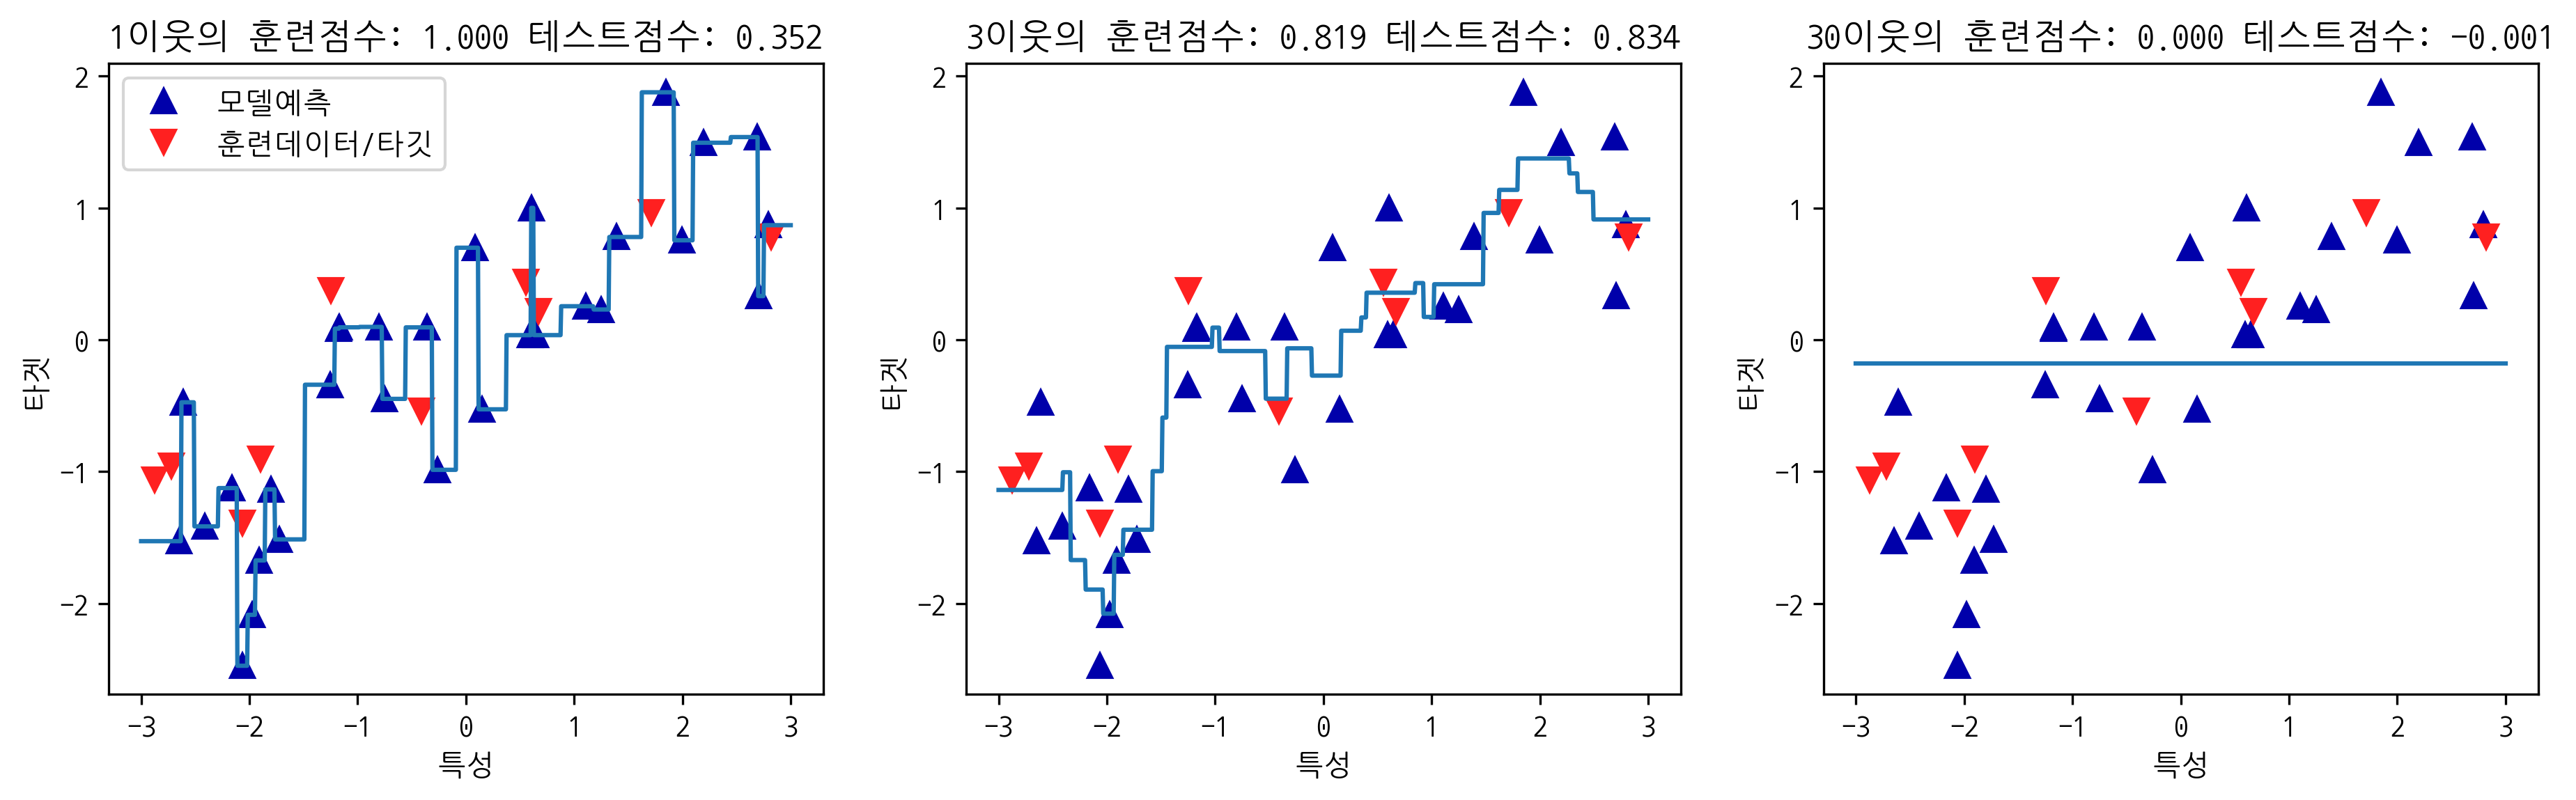

In [110]:
# KNeighborsRegressor의 결과를 시각화
fig, axes=plt.subplots(1,3,figsize=(15,4))

# -3과 3 사이의 1000개의 데이터포인트를 생성
line= np.linspace(-3,3,1000).reshape(-1,1)
for n,ax in zip([1,3,30],axes):
    knnreg = KNeighborsRegressor(n_neighbors=n).fit(X_train,y_train)
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.plot(line,knnreg.predict(line))
    ax.set_title("{}이웃의 훈련점수: {:.3f} 테스트점수: {:.3f}".
             format(n, knnreg.score(X_train, y_train), knnreg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")
    
axes[0].legend(["모델예측","훈련데이터/타깃"],loc="best")
plt.show()    

In [ ]:
# 분류 : 데이터를 묶어 놓은 것
# 회귀 : 여러값들의 평균을 구하는 것 

###### 실습2. 붓꽃 데이터셋

In [5]:
import data
from sklearn import datasets
iris= datasets.load_iris()
print('iris 데이터셋의 키: {}'.format(iris.keys())) 
# 데이터셋에 대한 설명, 앞부분",
print(iris['DESCR'][:200] + '\\n...')
# 예측하려는 붓꽃 품종의 이름",
print('타깃의 이름: {}'.format(iris['target_names']))
print('특성의 이름: {}'.format(iris['feature_names'])) 
print('자료의 타입: {}'.format(type(iris['data']))) 
print('target: {}'.format(type(iris['target'])))

iris 데이터셋의 키: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive\n...
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
자료의 타입: <class 'numpy.ndarray'>
target: <class 'numpy.ndarray'>


In [115]:
X_train,X_test,y_train,y_test = train_test_split(iris["data"], iris["target"],random_state=0)
print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

X_train 크기 : (112, 4)
y_train 크기 : (112,)


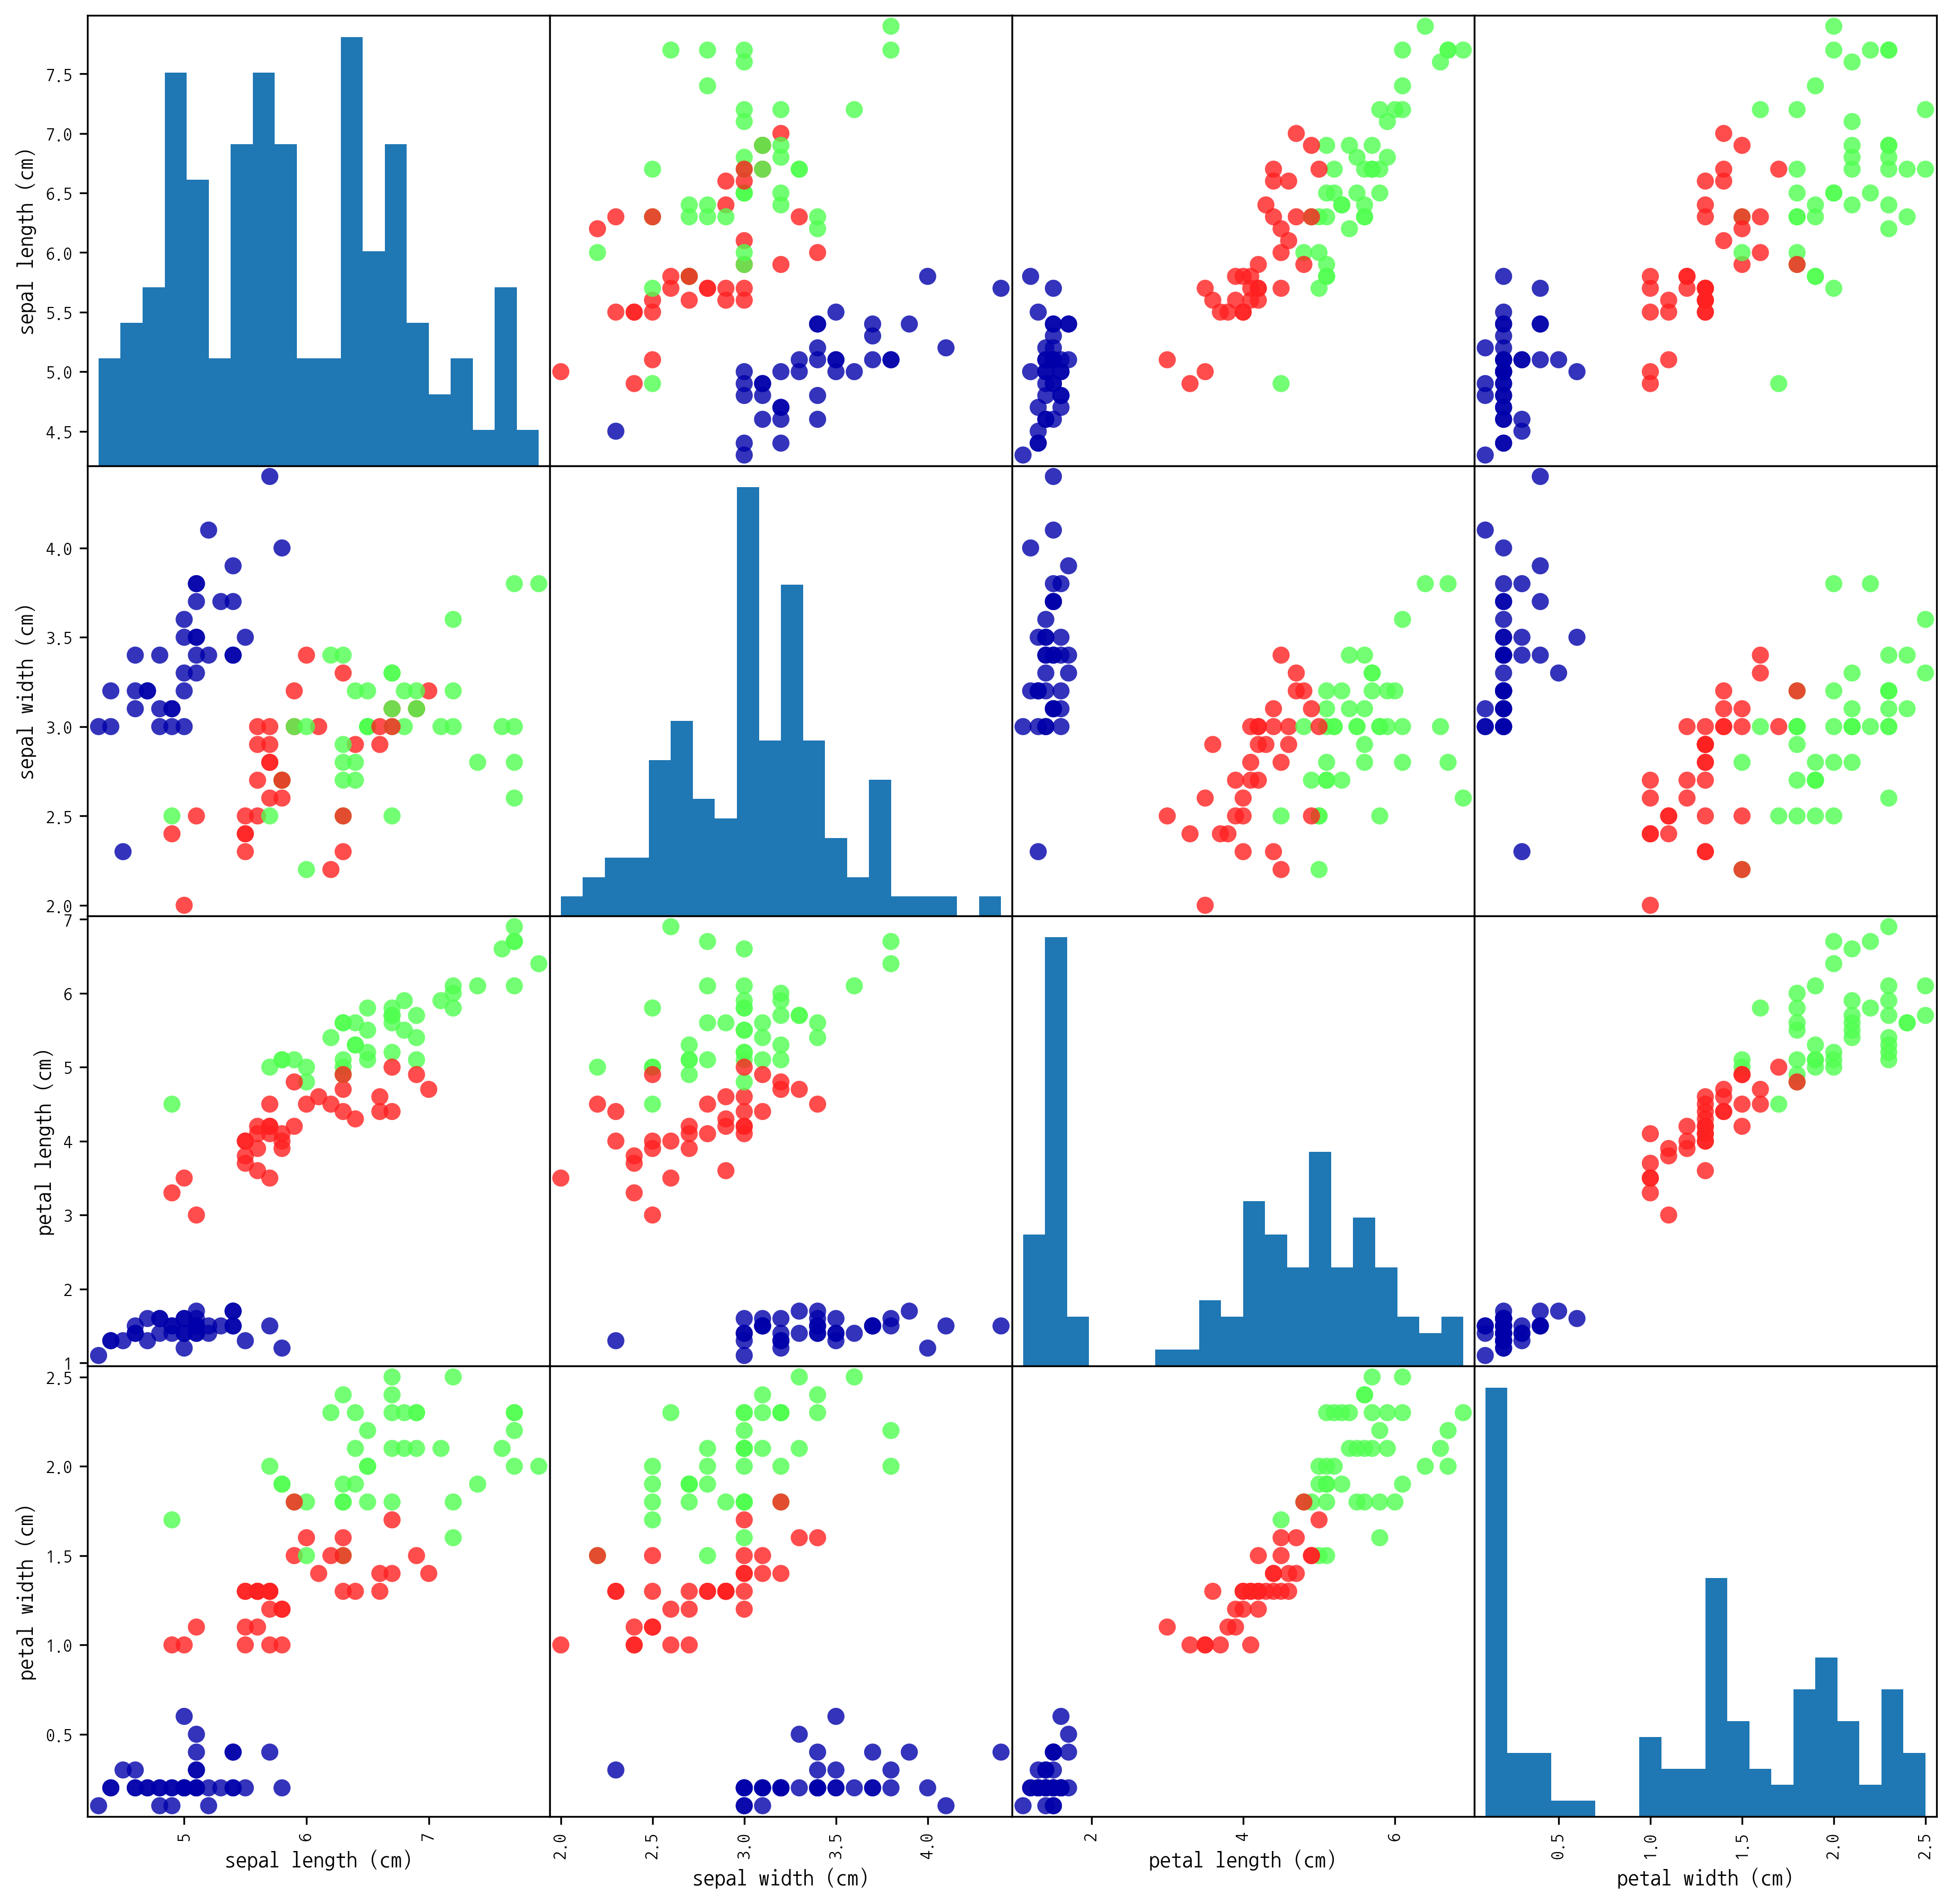

In [128]:
# 데이터의 시각화
iris_df= pd.DataFrame(X_train,columns=iris.feature_names)
iris_df.head()

# pair산점도
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15),marker='o'
                          ,hist_kwds={'bins':20},s=60,alpha=0.8,cmap=mglearn.cm3)
plt.show()

# 그래프를 보면 세가지 클래스가 비교적 잘 구부노디어 머신러닝하기에 적합한 데이터이다.
# 입력값이 꽃잎(넓이, 길이), 꽃받침(넓이,길이) 4개이기 때문에 4x4행렬로 그래프를 
# 출력, 이러한 그래프를 산점도행렬 그래프라고 한다.


In [129]:
# 학습시키기
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)

In [134]:
# 새로운 붓꽃 입력
# 꽃받침(넓이=2.0cm, 길이=5.0cm) 꽃잎(넓이=0.2cm, 길이 =1.0cm)
# 상기의 붓꽃의 품종은 ?
X_new = np.array([[5.0, 2.0, 1.0, 0.2]])
print('입력데이터{}'.format(X_new.shape))
# iris_df.head()
prediction = knn.predict(X_new)
print(prediction)
iris['target_names']
print("예측한 붓꽃의 품종:{}".format(iris['target_names'][prediction]))

입력데이터(1, 4)
[0]
예측한 붓꽃의 품종:['setosa']


In [143]:
# 모델평가
y_pred =knn.predict(X_test)
y_pred
print("검증용 데이터셋에 대한 품종예측결과 : \n{}".format(y_pred))

검증용 데이터셋에 대한 품종예측결과 : 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


13

In [146]:
# 예측율을 출력방법 2가지
print("검증용 데이터셋에 대한 정확도 : {:.3f}".format(knn.score(X_test,y_test)))
print("검증용 데이터셋에 대한 정확도 : {:.3f}".format(np.mean(y_pred==y_test)))

검증용 데이터셋에 대한 정확도 : 0.974
검증용 데이터셋에 대한 정확도 : 0.974


In [149]:
print("{}".format(y_pred==y_test))
# 결과 분석
# 마지막 자료만 불일치 97.4% 정확

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]


2

##### KNN의 유클리드거리 실습

* 참고 : https://ratsgo.github.io/machine%20learning/2017/04/17/KNN
 
#### 학습용 데이터셋
 카테고리는 '`과일`','`채소`','`단백질`' 3가지로 구분하고 데이터의 `단맛 , 아삭거림`에 따라 카테고리가 결정되는 실습, 닷맛과 , 아삭거림의 정도를 사용자에게 입력받아서 `target이라는 새롭게 분류할 데이터`를 생성

In [177]:
# 학습용 데이터
grape = [8, 5]
fish = [2, 3]
carrot = [7, 10]
orange = [7, 3]
celery = [3, 8]
cheese = [1, 1]
catagory = ['과일', '단백질', '채소', '과일', '채소', '단백질']
# 분류대상
dan = int(input('단맛 입력(1~10):'))
asac =  int(input('아삭거림 입력(1~10):'))
target = [dan, asac]


단맛 입력(1~10):5
아삭거림 입력(1~10):7


In [178]:
def data_set():
    dataset=[grape, fish, carrot, orange, celery, cheese] # 분류 집단
    size=len(dataset)
    class_target = np.tile(target,(size, 1)) # 분류대상
#     print(class_target.shape)
    class_catagory = np.array(category) # 분류클래스(정답)
#     print(class_catagory.shape)
    return dataset, class_target,class_catagory


In [179]:
# dataset 생성
dataset, class_target,class_catagory = data_set()
class_catagory

array(['과일', '단백질', '채소', '과일', '채소', '단백질'], dtype='<U3')

In [203]:
# 유클리드 거리 계산 함수를 생성
# 계산식을 이용하여 분류할 대상과 분류할 범주와의 거리를 구한 후 
# 가까운 거리에 있는 순으로 오름차순으로 정렬한 후 그 값에 따라서
# 어떤 카테고리인지에 가까운지를 분류한다.
def classify(dataset, class_target,class_catagory,k):
    # 유클리드거리계산
    diffMat = class_target-dataset# 두 점과의 차이
#     print(diffMat)
    sqDiffMat = diffMat**2       # 두점과의 차에 대한 제곱 '-'를 제거
#     print(sqDiffMat)
    row_sum = sqDiffMat.sum(axis=1)
#     print(row_sum)
    distance = np.sqrt(row_sum)
#     print(distance)
    # 가까운 거리 오름차순으로 정렬
    sortDist = distance.argsort()
#     print(sortDist)
    class_result ={}
    for i in range(k):
        c= class_catagory[sortDist[i]]
        class_result[c] = class_result.get(c,0)+1
    return class_result
    


In [205]:
k = int(input('이웃의 갯수(k값:1~3):'))
class_result = classify(dataset, class_target,class_catagory,k)
print(class_result)

이웃의 갯수(k값:1~3):3
{'채소': 2, '과일': 1}


In [206]:
def classify_result(class_result):
    protein = fruit = vegetable = 0
    
    for c in class_result.keys():
        if c == "단백질":
            protein = class_result[c]
        elif c == '과일':
            fruit= class_result[c]
        else:
            vegetable=class_result[c]
        
    if protein > fruit and protein>vegetable:
        result = "분류는 단백질입니다."
    elif fruit> protein and fruit > vegetable:
        result = "분류는 과일입니다."
    else:
        result = '분류는 채소입니다.'
    
    return result

In [207]:
print(classify_result(class_result))

분류는 채소입니다.


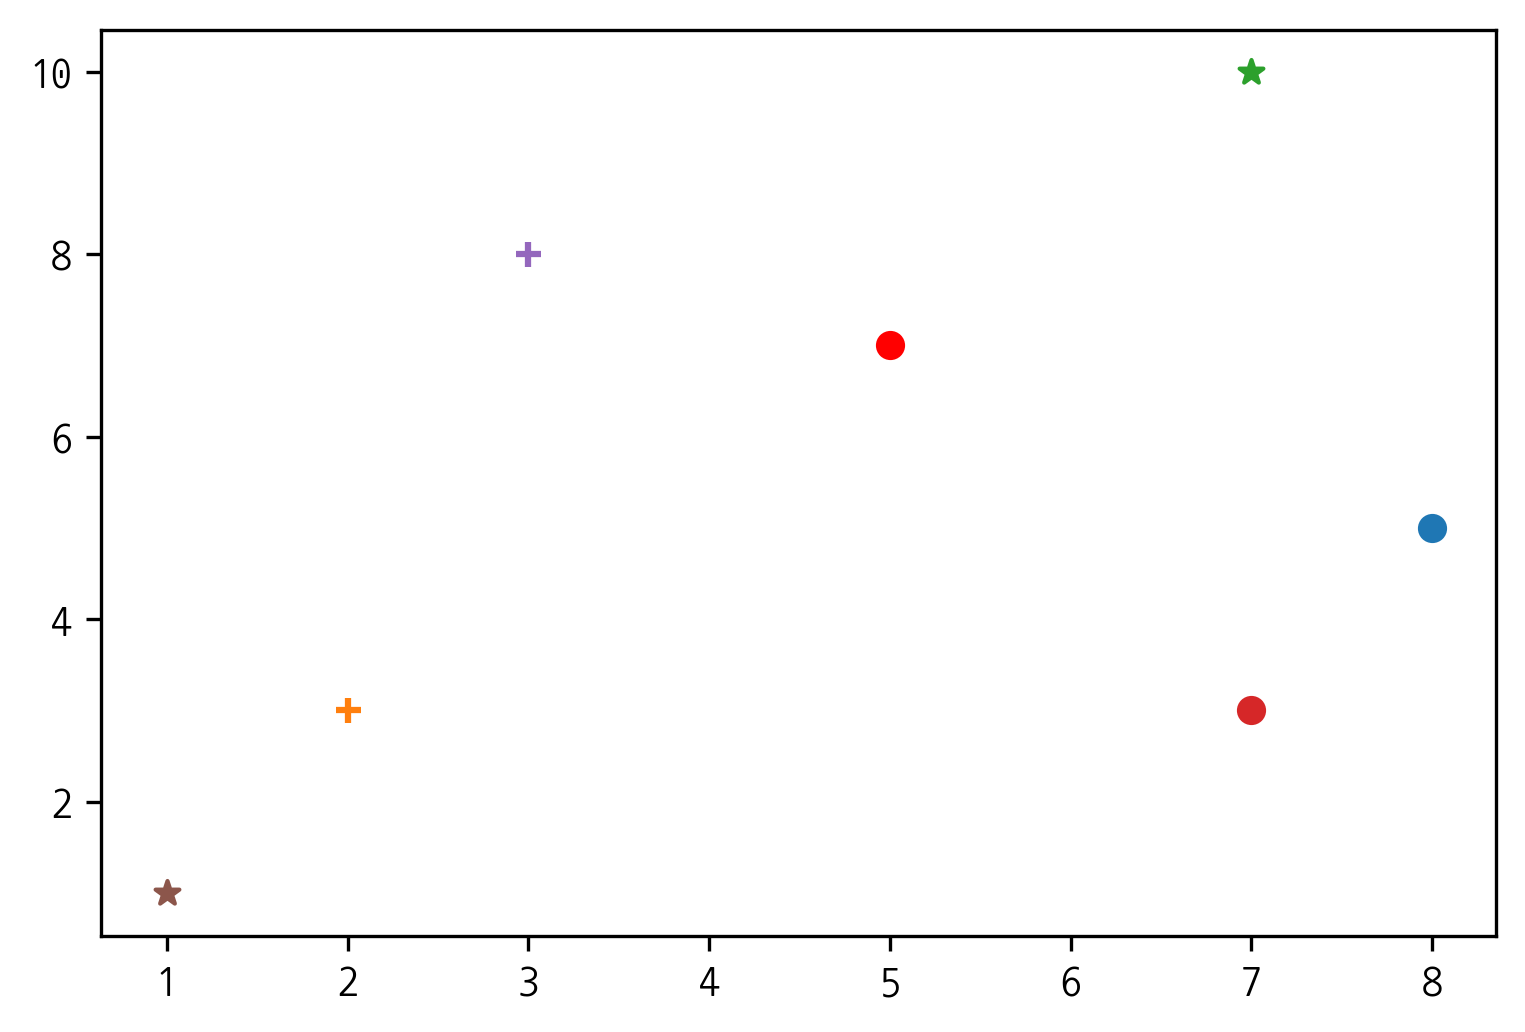

In [209]:
# 그래프 시각화
# 시각화 o= 과일, += 단백질, *=채소
plt.scatter(8,5,marker='o')
plt.scatter(2,3,marker='+')
plt.scatter(7,10,marker='*')
plt.scatter(7,3,marker='o')
plt.scatter(3,8,marker='+')
plt.scatter(1,1,marker='*')
plt.scatter(dan,asac,color="red") # 분류대상
plt.show()
